In [923]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [924]:
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.core.getipython import get_ipython
from IPython.display import Javascript
import pandas as pd

In [925]:
from load_results import load_results
from load_results import get_list_of_projects
from load_results import load_results_for_all_runs
from load_results import get_percentage_of_queries_with_correct_results
from load_results import plot_chance_of_getting_correct_result_in_n_lines

list_of_test_runs = get_list_of_test_runs()
list_of_test_runs

['gt -C1', 'gt -C2', 'initial test']

In [926]:
examples = load_results(list_of_test_runs[0])

## Quality of example cases

(array([ 9.,  0.,  0.,  0.,  0.,  2.,  3.,  4.,  1.,  0.,  0.,  0.,  3.,
        12., 21., 13.,  3.,  2.,  2.,  5.,  9., 28., 16.,  7.,  1.]),
 array([ 0. ,  3.8,  7.6, 11.4, 15.2, 19. , 22.8, 26.6, 30.4, 34.2, 38. ,
        41.8, 45.6, 49.4, 53.2, 57. , 60.8, 64.6, 68.4, 72.2, 76. , 79.8,
        83.6, 87.4, 91.2, 95. ]),
 <BarContainer object of 25 artists>)

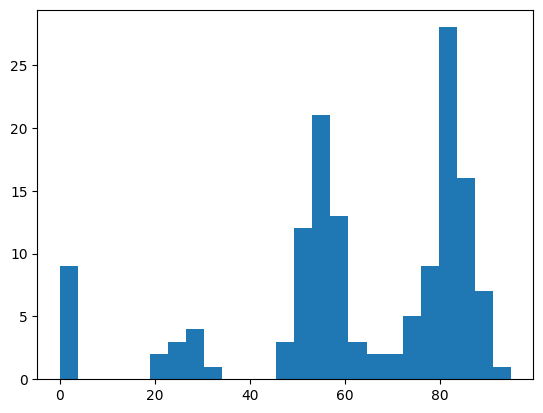

In [927]:
plt.hist([x['qualityScore'] for x in examples], 25)

### Total number of examples

In [928]:
len(examples)

141

### Number of examples after quality cutoff

In [929]:
MINIMUM_EXAMPLE_QUALITY = 75
examples = [example for example in examples if example['qualityScore'] >= MINIMUM_EXAMPLE_QUALITY]
len(examples)

62

(array([ 4.,  5.,  8., 10., 12., 15.,  3.,  2.,  2.,  1.]),
 array([75., 77., 79., 81., 83., 85., 87., 89., 91., 93., 95.]),
 <BarContainer object of 10 artists>)

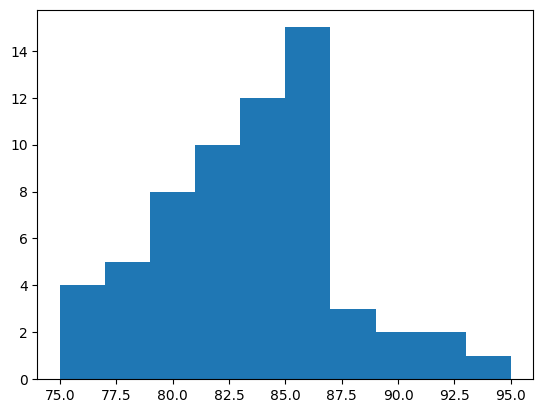

In [930]:
plt.hist([x['qualityScore'] for x in examples], 10)

## List of test runs

In [931]:
all_results = load_results_for_all_runs(MINIMUM_EXAMPLE_QUALITY)
df = pd.DataFrame(all_results, columns=["Test run name", "Data", "Engine"])
df.drop(columns=["Data"])

,Test run name,Engine
0,random,random
1,gt -C1,seagoat
2,gt -C2,seagoat
3,initial test,seagoat


## List of projects

## Comparison of accuracy between test runs

In [936]:
def generate_filter(project):
    return lambda result: result['repo']['name'] == project

project_filters = [
    ['All projects', lambda _: True],
] + [[project, generate_filter(project)] for project in projects]

results_filtered_by_project_filter = [
    [
        project_title,
        [[run_name, [result for result in result_data if filter_function(result)], engine] for run_name, result_data, engine in all_results],
    ]
    for project_title, filter_function in project_filters
]

for project_title, filtered_results in results_filtered_by_project_filter:
    df = pd.DataFrame(filtered_results, columns=["Test run name", "Data", "Engine"])
    df['Examples'] = df.apply(lambda row: len(row['Data']), axis=1)
    df['Queries'] = df.apply(lambda row: sum([len(x['queries']) for x in row['Data']]), axis=1)
    df['Query success %'] = df.apply(get_percentage_of_queries_with_correct_results, axis=1).apply(lambda x: "{:.2%}".format(x))
    df['Workflow success %'] = df.apply(get_percentage_of_examples_with_correct_results, axis=1).apply(lambda x: "{:.2%}".format(x))
    df['Average position of result'] = df.apply(get_average_position_of_a_correct_results, axis=1)
    
    display(df.drop(columns=["Data"]).style.set_caption(project_title))

,Test run name,Engine,Examples,Queries,Query success %,Workflow success %,Average position of result
0,random,random,62,433,0.46%,3.23%,26.500000
1,gt -C1,seagoat,62,433,47.11%,85.48%,35.666667
2,gt -C2,seagoat,62,433,50.58%,91.94%,36.753425
3,initial test,seagoat,62,433,37.41%,72.58%,38.049383


,Test run name,Engine,Examples,Queries,Query success %,Workflow success %,Average position of result
0,random,random,36,252,0.00%,0.00%,nan
1,gt -C1,seagoat,36,252,43.25%,86.11%,29.788991
2,gt -C2,seagoat,36,252,45.63%,91.67%,30.356522
3,initial test,seagoat,36,252,33.73%,66.67%,30.211765


,Test run name,Engine,Examples,Queries,Query success %,Workflow success %,Average position of result
0,random,random,26,181,1.10%,7.69%,26.500000
1,gt -C1,seagoat,26,181,52.49%,84.62%,42.410526
2,gt -C2,seagoat,26,181,57.46%,92.31%,43.826923
3,initial test,seagoat,26,181,42.54%,80.77%,46.701299


## Chance of correct result by line N

### By test run

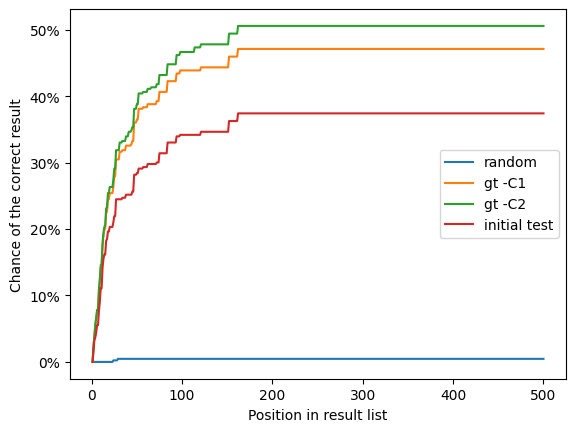

In [933]:
plot_chance_of_getting_correct_result_in_n_lines(all_results, lambda test_run, query, engine, example: test_run)

### By project

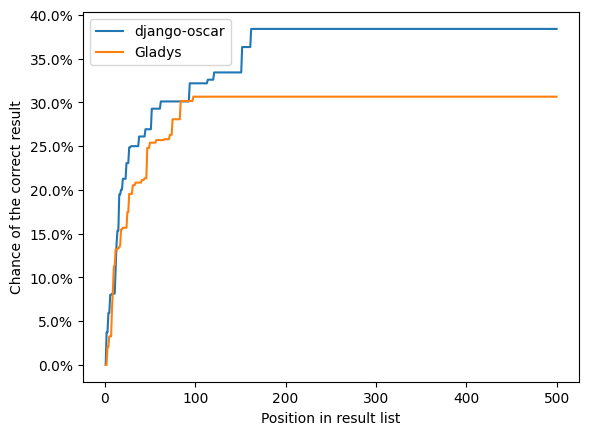

In [934]:
plot_chance_of_getting_correct_result_in_n_lines(all_results, lambda test_run, query, engine, example: example['repo']['name'])

### By file extension

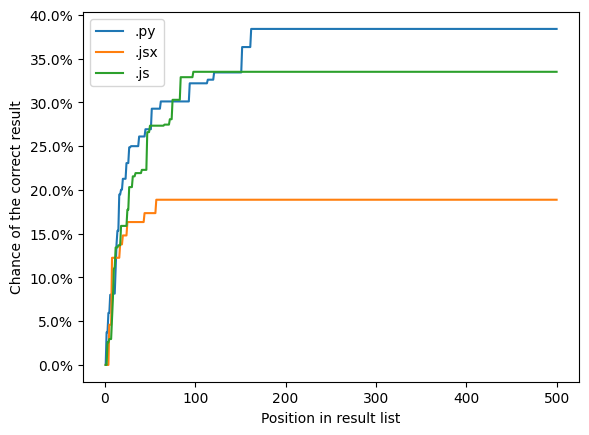

In [935]:
import os
plot_chance_of_getting_correct_result_in_n_lines(all_results, lambda test_run, query, engine, example: os.path.splitext(example['targetCode']['path'])[1])